## template for first exploration 
Scaling version 1 from 02_feature_engineering
used dummies for pure categoricals, kept numericals and scaled them using StandardScaler.

### copy this 
make your own copy of this and try your algorithm! 

Also, please feel free to play around with the scaling itself!

In [56]:
#initial imports 
import sys
import pandas as pd
import numpy as np
from pathlib import Path
from typing import Optional
import seaborn as sns
import matplotlib.pyplot as plt

import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Get the absolute path of the current file/notebook
# If using Jupyter, use Path.cwd(). If using a .py script, use Path(__file__).parent
curr_dir = Path.cwd()

# Calculate the project root (adjust '.parent' count as needed)
# If your notebook is in 'project/notebooks/', the root is 1 level up
project_root = curr_dir.parent.parent 

# Add project root to system path so Python can find 'utils'
sys.path.append(str(project_root))

print(f"Project Root added to path: {project_root}")

from utils.feature_engineer_df import build_features 

#for the scaling and encoding 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#cleanup 

pd.set_option('display.max_columns', None)

Project Root added to path: c:\Users\leyah\Documents\weiterbildung\neuefische\week8\ds-ml-project_kickstarters


In [57]:
#get your data from our utils
build_features(
    input_path=Path.cwd().resolve().parents[1] / "data" / "cleaned" / "kickstarter_cleaned.csv",
    output_path=Path.cwd().resolve().parents[1] / "data" / "feature" / "kickstarter_featured.csv",
    raw_path=Path.cwd().resolve().parents[1] / "data" / "raw" / "ks-projects-201801.csv",
    logger=logger
)

# Load Files as DataFrames
BASE_DIR = Path.cwd().resolve().parents[1]
data_file = BASE_DIR / "data" / "feature" / "kickstarter_featured.csv"

filepath = Path(data_file)

df = pd.read_csv(filepath, encoding='latin-1', low_memory=False)

INFO:__main__:Starting feature engineering pipeline
INFO:__main__:Loaded 331675 rows
INFO:__main__:Final columns before save: ['id', 'main_category', 'deadline', 'launched', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'duration_days', 'target', 'main_category_grouped', 'continent', 'launched_year', 'launched_month', 'deadline_year', 'deadline_month', 'usd_goal_bins', 'usd_pledged_bins', 'pledged_per_category', 'goal_per_category', 'category_goal_percentile', 'duration_bins', 'backers_per_pledged', 'backer_pledged_bins', 'launch_season', 'deadline_season']
INFO:__main__:Saved engineered dataset to C:\Users\leyah\Documents\weiterbildung\neuefische\week8\ds-ml-project_kickstarters\data\feature\kickstarter_featured.csv


In [58]:
#list of columns to "hard drop" from feature engineering dataframe
columns_to_drop = ['id', #irrelevant
                   'main_category', #substituted in a satisfactory way
                   'deadline', 'launched', #created new categories 
                   'backers', 'usd_pledged_real', 'usd_pledged_bins', 'backers_per_pledged', 'backer_pledged_bins', 'pledged_per_category', #everything to do with "future information"
                   'launched_year', 'deadline_year', #info about the past and not seasonal
                   ]
# drop them
dfc = df.drop(columns=columns_to_drop)

Get dummies for pure categoricals:

Starting here I (leya) will be working on this notebook

In [59]:
df_sl = pd.get_dummies(dfc['launch_season'], prefix = 'sl_', drop_first=True, dtype=int)
df_sd = pd.get_dummies(dfc['deadline_season'], prefix = 'sd_', drop_first=True, dtype=int)
df_cat = pd.get_dummies(dfc['main_category_grouped'], prefix = 'cat_', drop_first=True, dtype=int)
df_co = pd.get_dummies(dfc['continent'], prefix = 'co_', drop_first=True, dtype=int)
df_ugb = pd.get_dummies(dfc['usd_goal_bins'], prefix = 'ugb_', drop_first=True, dtype=int)
df_cgp = pd.get_dummies(dfc['category_goal_percentile'], prefix = 'cgp_', drop_first=True, dtype=int)
df_db = pd.get_dummies(dfc['duration_bins'], prefix = 'db_', drop_first=True, dtype=int)
#put everything back together again: 
dff = pd.concat([dfc, df_sl, df_sd, df_cat, df_co, df_ugb, df_db, df_cgp], axis=1)

In [60]:

dff = dff.drop(columns=['main_category_grouped', 'continent', 'launch_season', 'deadline_season', 'category_goal_percentile', 'duration_bins', 'usd_goal_bins', 'country'])
dff.head(2)

,usd_goal_real,duration_days,target,launched_month,deadline_month,goal_per_category,sl__Spring,sl__Summer,sl__Winter,sd__Spring,sd__Summer,sd__Winter,cat__Creative,cat__Entertainment,cat__Other,cat__Tech,co__Europe,co__North America,co__Oceania,co__Other,ugb__Low,ugb__Medium,ugb__Very High,ugb__Very Low,db__4 weeks,db__6 weeks,db__8 weeks,db__8+ weeks,db__<2 weeks,cgp__Low,cgp__Medium,cgp__Very High,cgp__Very Low
0,30000.0,59,0,9,11,58616.915835,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,45000.0,44,0,1,2,58616.915835,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [61]:
#first, create our dfs 
X = dff.drop(columns=['target'])
y = dff['target']
#get train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print("Df before", dff.shape)
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

Df before (293019, 33)
X_train shape (205113, 32)
X_test shape (87906, 32)
y_train shape (205113,)
y_test shape (87906,)


Uses a stratified split (to preserve class distribution). Output confirms dimensions before and after the split:

Df before (293019, 33)

* X_train shape (205113, 32)
* X_test shape (87906, 32)
* y_train shape (205113,)
* y_test shape (87906,)

## General thoughts

For this prediction project I am doing binary classification: 
* Positive class = successful

* Negative class = failed

Risks of FP: waste of invested time and money

Risks of FN: waste of talent and lost of great project and potential

* Accuracy - for baseline and generall correctness
* Precision - how many TP, highlights the importance of FP
* Recall - importance of FN
* F1 - balance of Precision and Recall

| My goal                               | My metric |
| ---------------------------------------------------- | --------------- |
| **..to avoid launching weak and doomed projects**  | **Precision**   |
| **..to find as many good ideas as possible** | **Recall**      |
| **..to balance both**          | **F1-score**    |



In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#training my model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test)

In [63]:
#additional lore: it removes the first three numbers after the zero

#acc_score = accuracy_score(y_test, y_pred)
#prec_score = precision_score(y_test, y_pred)
#rec_score = recall_score(y_test, y_pred)
#f_score = f1_score(y_test, y_pred)
#print(f"Accuracy score: {acc_score:.3f}")
#print(f"Precision score: {prec_score:.3f}")
#print(f"Recall score: {rec_score:.3f}")
#print(f"F1 score: {f_score:.3f}")

In [64]:
#baseline performance doesn't look great
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.5891065456282848
Precision: 0.5564062023244848
Recall: 0.49914151342473934
F1: 0.5262205199506808


In [65]:
#Grid search cv does his best to find the best combination of hyperparameters by testing different options through cross validation
from sklearn.model_selection import GridSearchCV
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1_score': 'f1'
}

param_grid = {
    'max_depth': [3, 5, 10, None],                          #limit the depth of the tree
    'min_samples_split': [2, 5, 10],                        #minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]                           #minimum samples required to be a leaf
}
# Set up the grid search
grid_accuracy = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),      #base estimator (for DT)
    param_grid=param_grid,                                  #search space
    scoring=scoring,                                        #multiple metrics
    refit='accuracy',                                       #choose which metric selects the best model
    cv=5,                                                   #5-fold cross-validation
    n_jobs=-1                                               #Use all CPU cores for faster computation
)

grid_recall = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),      
    param_grid=param_grid,                                     
    scoring=scoring,                                      
    refit='recall',                                          
    cv=5,                                              
    n_jobs=-1                                                  
)

grid_precision = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),      
    param_grid=param_grid,                                    
    scoring=scoring,                                     
    refit='precision',                                          
    cv=5,                                                 
    n_jobs=-1                                                  
)

grid_f1 = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),      
    param_grid=param_grid,                                     
    scoring=scoring,                                        
    refit='f1_score',                                           
    cv=5,                                                 
    n_jobs=-1                                                   
)

#train and evaluate the model on each fold
#Try every combination of the parameters
#Select the best one based on metric

In [66]:

grid_accuracy.fit(X_train, y_train)
grid_precision.fit(X_train, y_train)
grid_recall.fit(X_train, y_train)
grid_f1.fit(X_train, y_train)
print("Best Params:", grid_accuracy.best_params_)
print("Best Params:", grid_precision.best_params_)
print("Best Params:", grid_recall.best_params_)
print("Best Params:", grid_f1.best_params_)

Best Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
#use the best model found
best_clf = grid_accuracy.best_estimator_
best_clf = grid_precision.best_estimator_
best_clf = grid_recall.best_estimator_
best_clf = grid_f1.best_estimator_
y_pred_best = best_clf.predict(X_test)


In [68]:
# Accuracy-optimized model
best_accuracy_clf = grid_accuracy.best_estimator_
y_pred_acc = best_accuracy_clf.predict(X_test)
print("\n Accuracy-Optimized Model")
print("Accuracy:", accuracy_score(y_test, y_pred_acc))
print("Precision:", precision_score(y_test, y_pred_acc))
print("Recall:", recall_score(y_test, y_pred_acc))
print("F1:", f1_score(y_test, y_pred_acc))

# Precision-optimized model
best_precision_clf = grid_precision.best_estimator_
y_pred_prec = best_precision_clf.predict(X_test)
print("\n Precision-Optimized Model")
print("Accuracy:", accuracy_score(y_test, y_pred_prec))
print("Precision:", precision_score(y_test, y_pred_prec))
print("Recall:", recall_score(y_test, y_pred_prec))
print("F1:", f1_score(y_test, y_pred_prec))

# Recall-optimized model
best_recall_clf = grid_recall.best_estimator_
y_pred_rec = best_recall_clf.predict(X_test)
print("\n Recall-Optimized Model")
print("Accuracy:", accuracy_score(y_test, y_pred_rec))
print("Precision:", precision_score(y_test, y_pred_rec))
print("Recall:", recall_score(y_test, y_pred_rec))
print("F1:", f1_score(y_test, y_pred_rec))

# F1-optimized model
best_f1_clf = grid_f1.best_estimator_
y_pred_f1 = best_f1_clf.predict(X_test)
print("\n F1-Optimized Model")
print("Accuracy:", accuracy_score(y_test, y_pred_f1))
print("Precision:", precision_score(y_test, y_pred_f1))
print("Recall:", recall_score(y_test, y_pred_f1))
print("F1:", f1_score(y_test, y_pred_f1))



 Accuracy-Optimized Model
Accuracy: 0.64646326758128
Precision: 0.6177634130575307
Recall: 0.5945206161196407
F1: 0.6059192006289468

 Precision-Optimized Model
Accuracy: 0.64646326758128
Precision: 0.6177634130575307
Recall: 0.5945206161196407
F1: 0.6059192006289468

 Recall-Optimized Model
Accuracy: 0.6073533092166633
Precision: 0.5561540746608575
Recall: 0.6988080722621743
F1: 0.6193731942392096

 F1-Optimized Model
Accuracy: 0.6073533092166633
Precision: 0.5561540746608575
Recall: 0.6988080722621743
F1: 0.6193731942392096


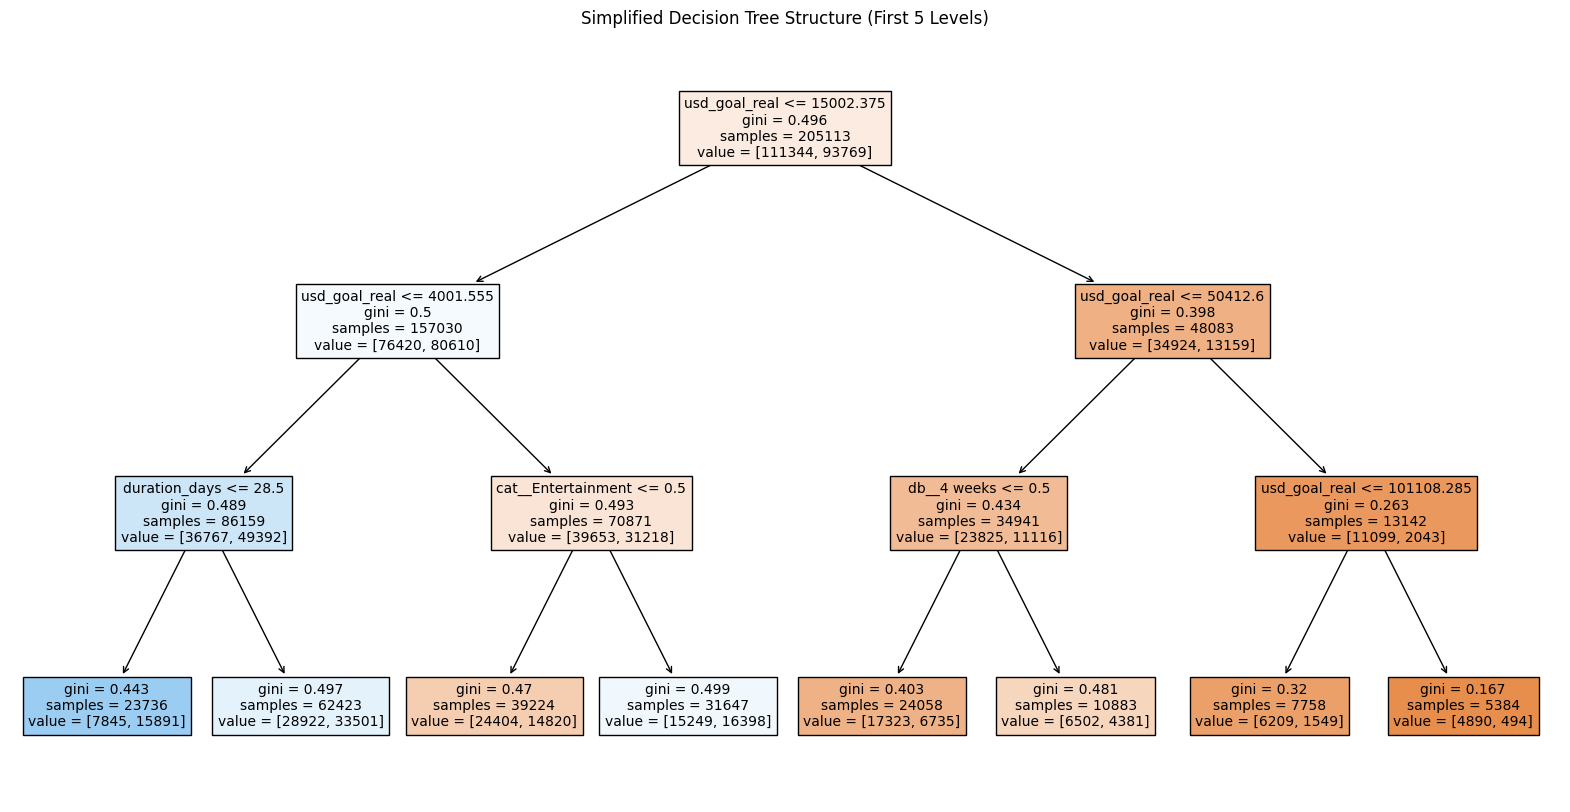

In [69]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_f1_clf, filled=True, feature_names=X_train.columns, max_depth=4, fontsize=10)
plt.title("Simplified Decision Tree Structure (First 5 Levels)")
plt.show()

#each box is a decision node or a leaf:
#split condition (usd_goal_real <= 15002.375)
#gini: gini impurity (0 = pure, 0.5 = most impure)
#samples: number of data points that reached this node
#value = [class_0, class_1]: Count of samples per class (failed, successful)
#color: indicates purity and dominant class (blueish = more class 1, orange = more class 0)

## Interpretation
- usd_goal_real:	    

most influential split feature — low goals lead to better success chances

- duration_days:	    

shorter campaigns among low-goal projects increase likelihood of success

- db__4 weeks:	        

duration bin split matters for medium-to-high goal campaigns

- cat__Entertainment:	

certain categories perform differently — entertainment slightly more successful

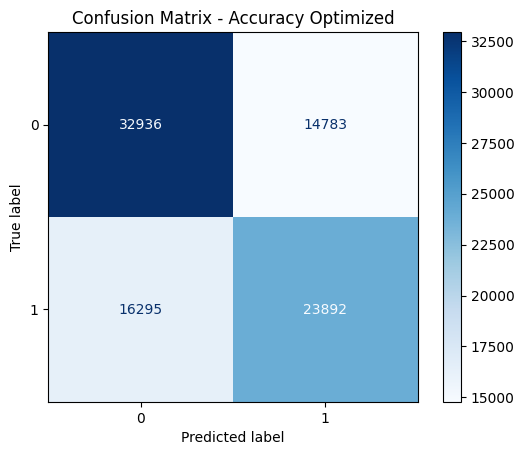

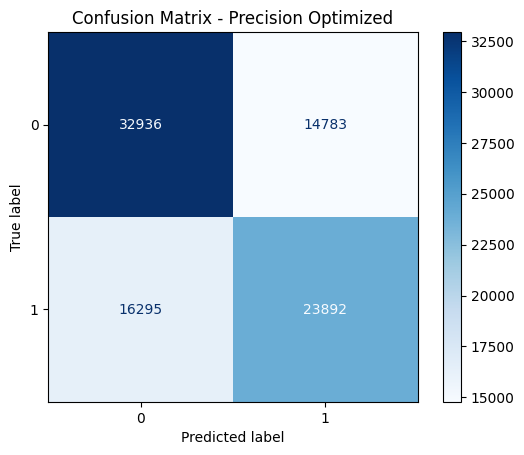

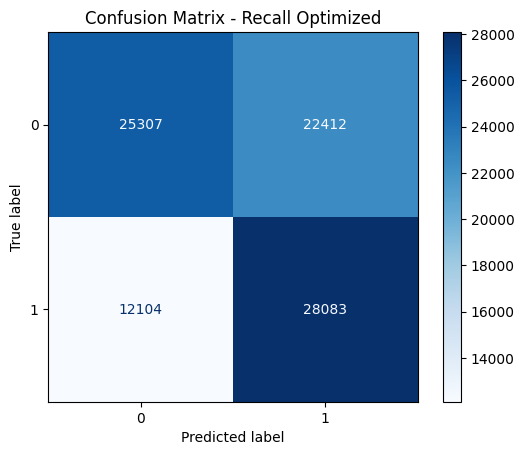

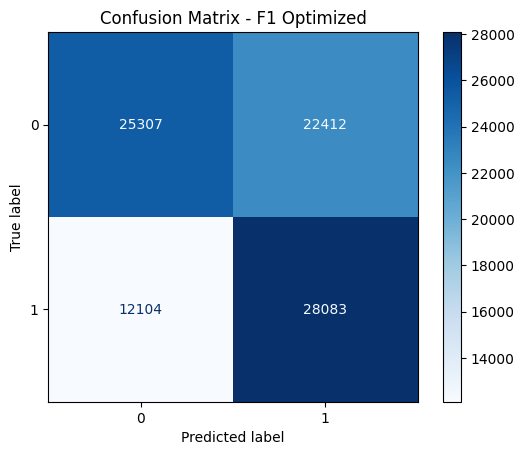

In [70]:
#Confusion Matrices
       #Predicted
            #0     1
#Actual  0 |  TN |  FP |
        #1 |  FN |  TP |

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#define a helper to show the confusion matrix
def show_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

#display for each optimized model
show_conf_matrix(y_test, y_pred_acc, "Confusion Matrix - Accuracy Optimized")
show_conf_matrix(y_test, y_pred_prec, "Confusion Matrix - Precision Optimized")
show_conf_matrix(y_test, y_pred_rec, "Confusion Matrix - Recall Optimized")
show_conf_matrix(y_test, y_pred_f1, "Confusion Matrix - F1 Optimized")


* More TP: better at finding successful projects

* More FP: more false alarms (bad projects that looked good)

* More FN: missed opportunities (good projects predicted as failures)

- FP ↓ = Precision ↑

- FN ↓ = Recall ↑

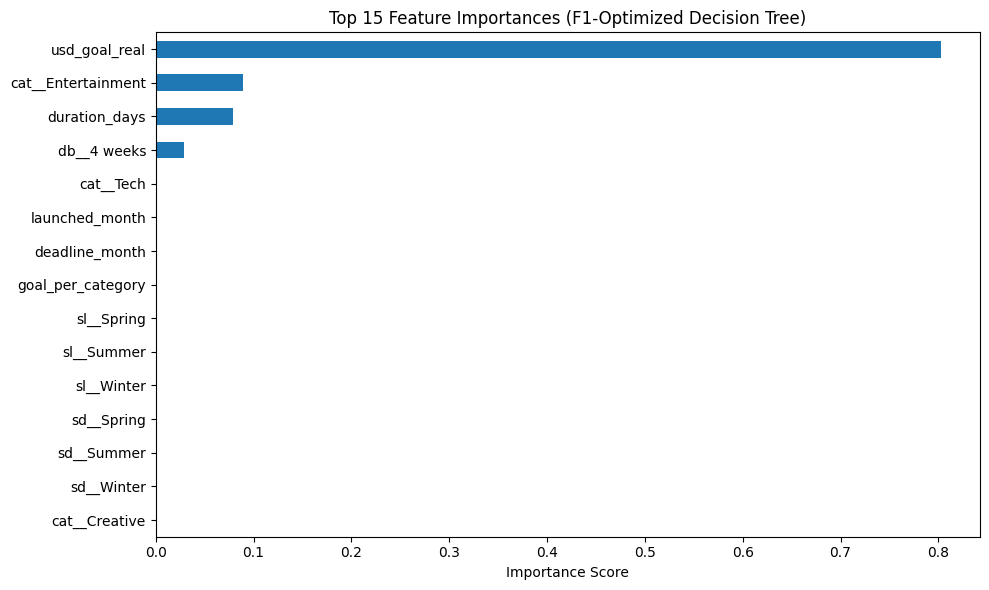

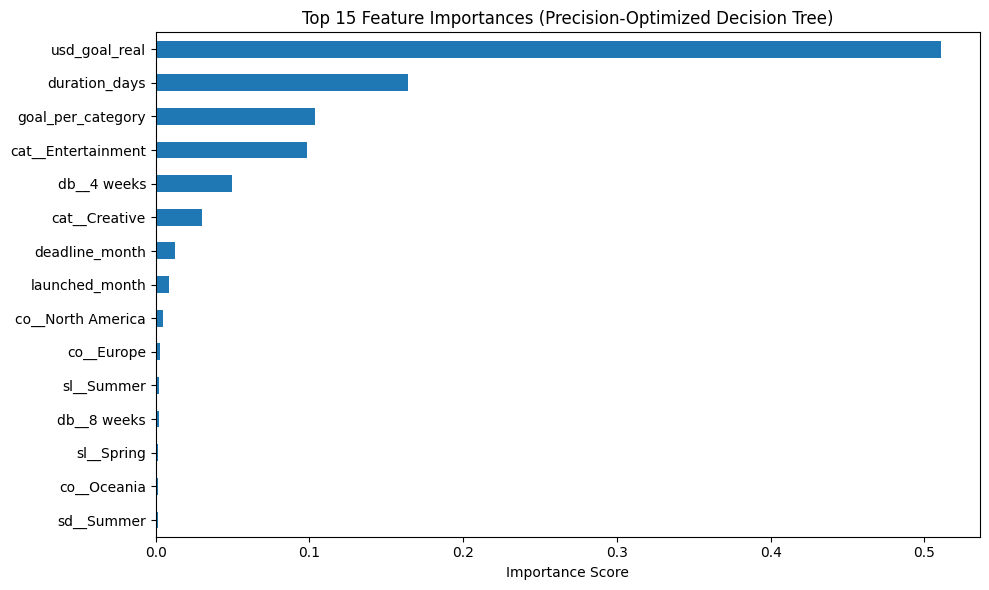

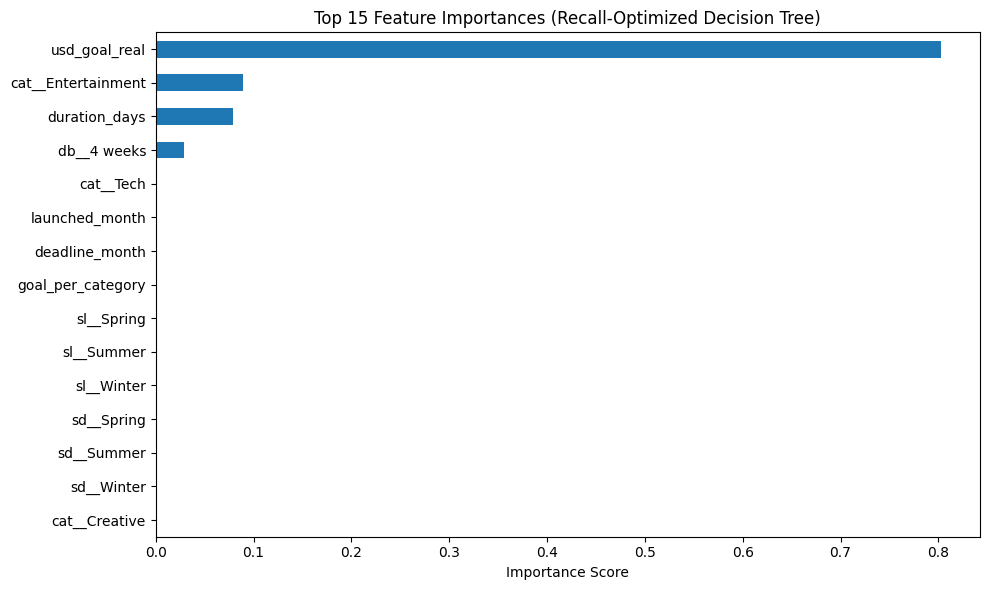

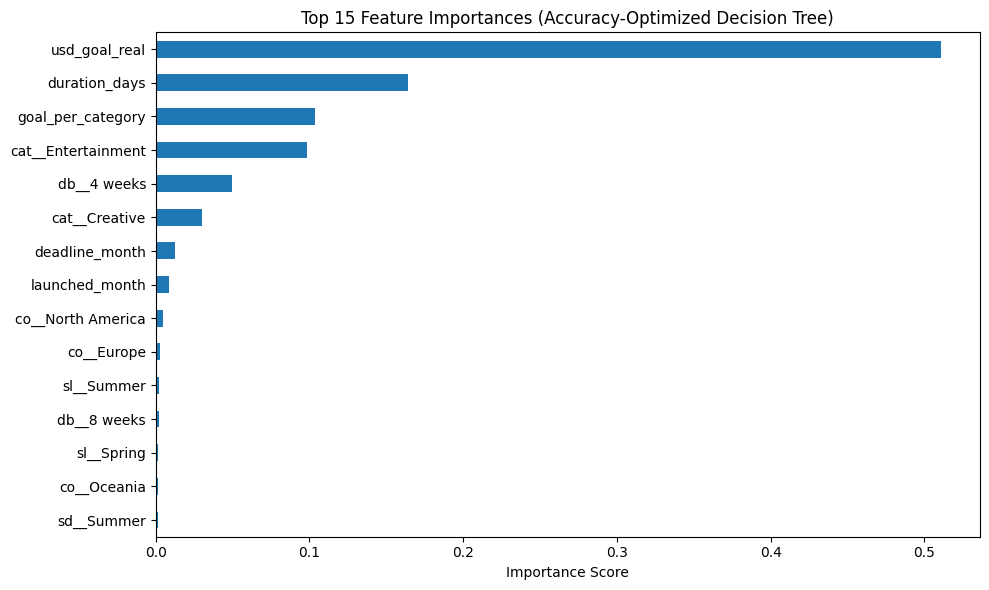

In [71]:
#Feature importance plot (from best model)
#here I assume best_f1_clf for demo
importances = best_f1_clf.feature_importances_
features = X_train.columns

#sort and plot
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True).tail(15)
feat_imp.plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Feature Importances (F1-Optimized Decision Tree)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

#replace best_f1_clf with another model to analyze a different one.

#PRECISION
importances = best_precision_clf.feature_importances_
features = X_train.columns

#sort and plot
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True).tail(15)
feat_imp.plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Feature Importances (Precision-Optimized Decision Tree)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


#RECALL
importances = best_recall_clf.feature_importances_
features = X_train.columns

#sort and plot
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True).tail(15)
feat_imp.plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Feature Importances (Recall-Optimized Decision Tree)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

#ACCURACY
importances = best_accuracy_clf.feature_importances_
features = X_train.columns

#sort and plot
feat_imp = pd.Series(importances, index=features).sort_values(ascending=True).tail(15)
feat_imp.plot(kind='barh', figsize=(10, 6))
plt.title("Top 15 Feature Importances (Accuracy-Optimized Decision Tree)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## Explanation

* feature_importances: gives the relative importance of each feature used by the tree in making splits.

* sort_values(ascending=True).tail(15): picks the 15 most important features, sorted from least to most.

* barh: horizontal bar chart makes it easy to compare feature impact.

## Interpretation

* Features like usd_goal_real, duration_days or specific one-hot-encoded season/category features seemed to be important.

* Differences across models (F1 vs. Precision) can tell which features contribute to recall vs. predictions.

## HOW CAN I IMPROVE MY MODEL?

1. Class weighting 

- for class imbalance

2. Reducing Features and trying both reduced and not-reduced features for modeling


## 1. Class imbalance 

 class_weight='balanced' 
 
 unbalanced classes can hurt the model

In [72]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)



DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [73]:
y_pred_balanced = clf.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Balanced Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Precision:", precision_score(y_test, y_pred_balanced))
print("Recall:", recall_score(y_test, y_pred_balanced))
print("F1 Score:", f1_score(y_test, y_pred_balanced))


Balanced Decision Tree Metrics:
Accuracy: 0.586228471321639
Precision: 0.5455566172957478
Recall: 0.5682683454848583
F1 Score: 0.5566809267858667


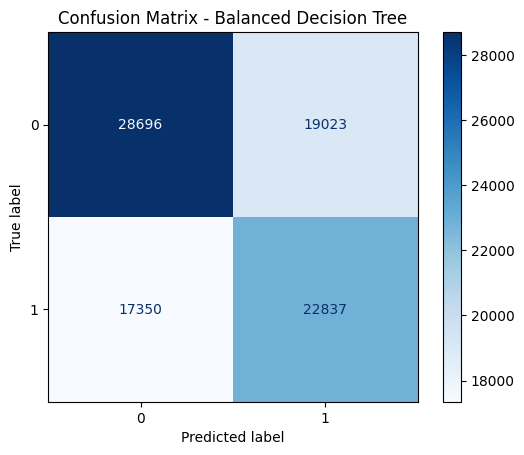

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_balanced, cmap="Blues")
plt.title("Confusion Matrix - Balanced Decision Tree")
plt.show()


## Note
Class_weight for balancing made my model worse, it is an incorrect way to improve my model. 

* Apparently that happens when classes are not severely imbalanced

* The decision boundary becomes distorted

Let's try something different..

## 2. Feature selection


In [76]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(best_f1_clf, prefit=True)
X_train_reduced = selector.transform(X_train)
X_test_reduced = selector.transform(X_test)

print("Original feature count:", X_train.shape[1])
print("Reduced feature count:", X_train_reduced.shape[1])


Original feature count: 32
Reduced feature count: 3


c:\Users\leyah\Documents\weiterbildung\neuefische\week8\ds-ml-project_kickstarters\.venv\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\leyah\Documents\weiterbildung\neuefische\week8\ds-ml-project_kickstarters\.venv\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [77]:
clf_reduced = DecisionTreeClassifier(random_state=42)
clf_reduced.fit(X_train_reduced, y_train)

y_pred_reduced = clf_reduced.predict(X_test_reduced)

print("Accuracy:", accuracy_score(y_test, y_pred_reduced))
print("Precision:", precision_score(y_test, y_pred_reduced))
print("Recall:", recall_score(y_test, y_pred_reduced))
print("F1 Score:", f1_score(y_test, y_pred_reduced))


Accuracy: 0.6108343002752941
Precision: 0.5802863820755985
Recall: 0.5374872471197153
F1 Score: 0.5580674331481721


In [78]:
selected_features = X_train.columns[selector.get_support()]
print(selected_features.tolist())           #names of Kept Features

['usd_goal_real', 'duration_days', 'cat__Entertainment']


## Note:
This model works slightly worse, by removing less important or noisy features I might have oversimplified my model..

What if I apply RF and XGBoost on reduced features?

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_reduced, y_train)

y_pred_rf = rf_clf.predict(X_test_reduced)

print("Random Forest on Reduced Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest on Reduced Features:
Accuracy: 0.6117898664482515
Precision: 0.5776832175540232
Recall: 0.5607783611615696
F1 Score: 0.5691052804363746


In [80]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_reduced, y_train)

y_pred_xgb = xgb_clf.predict(X_test_reduced)

print("XGBoost on Reduced Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))


c:\Users\leyah\Documents\weiterbildung\neuefische\week8\ds-ml-project_kickstarters\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:37:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost on Reduced Features:
Accuracy: 0.6398880622483107
Precision: 0.6164323734134025
Recall: 0.561947893597432
F1 Score: 0.5879305407305199


What if on not-reduced, origital train set?

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest on Not-Reduced Features:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest on Not-Reduced Features:
Accuracy: 0.6069892840079175
Precision: 0.5736527258953528
Recall: 0.5464453679050439
F1 Score: 0.5597186114084722


In [89]:
#xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
#xgb_clf.fit(X_train, y_train)

#y_pred_xgb = xgb_clf.predict(X_test_reduced)

#print("XGBoost on Not_Reduced Features:")
#print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
#print("Precision:", precision_score(y_test, y_pred_xgb))
#print("Recall:", recall_score(y_test, y_pred_xgb))
#print("F1 Score:", f1_score(y_test, y_pred_xgb))

#ValueError: feature_names must be string, and may not contain [, ] or
#the line xgb_clf.fit(X_train, y_train)  is the issue

## Final thoughts on my models:

Why did other models work slightly worse?

I explored the following model improvements:

- Class weighting

- Feature selection

- Ensemble models (Random Forest, XGBoost) - with and without reduced features


None of them surpassed the performance of the tuned decision tree in the beginning:

* Perhaps the feature space is relatively simple

* Decision trees already captured the important patterns

* Overcomplicating the model led to overfitting or minimal gain

## Summary

Careful feature engineering and grid search might matter more than model choice.

Model achieved a good balance between detecting successes and avoiding false positives.

## As a reminder, my first model (not the baseline!) results:
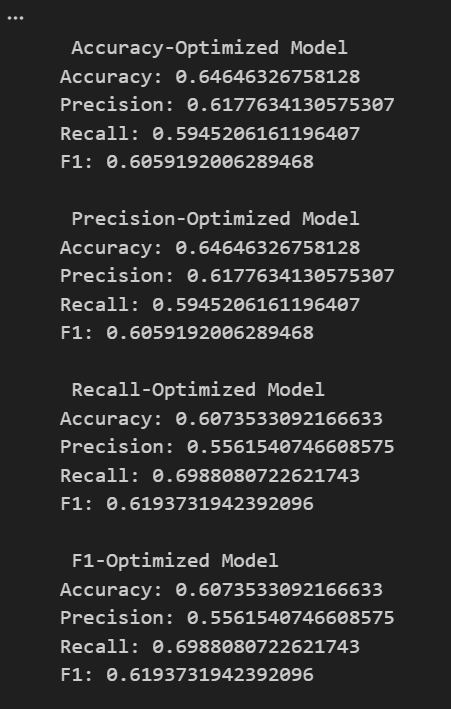